In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle

### BEGIN show_all
def _show_all():
    try:
        from IPython.core.interactiveshell import InteractiveShell
        InteractiveShell.ast_node_interactivity = "all"
    except:
        pass 
### END show_all
    
### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# `nbi_stat` Examples<a class='tocSkip'></a>
## Complete examples with some explanations <a class='tocSkip'></a>
## 0.1 - December 2019 <a class='tocSkip'></a>

> In this note, we will show some examples of using the module `nbi_stat` available from the [NBI-Python](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik) page.  For motivation, arguments, and statistical considerations, we refer you to the full text of [Statistics Overview - Using Python](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik). 
>
> The module `nbi_stat` is a Python module with various numerical and statistical tools to ease various tasks, such as 
>
> - Presentation of data in tables and visually
> - Reporting results 
> - Calculating statistical quantities 
> - Histogramming
> - Random samplling
> - Propagation of uncertainties 
> - Curve fitting 
>
> The module is built on top of [_SciPy_](https://scipy.org) and [_NumPy_](https://numpy.org) and is throughly [documented](https://cholmcc.gitlab.io/nbi-python/statistics/nbi_stat/). 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

# Introduction

If you haven't already, you should install the `nbi_stat` module.  Just do as [we would normally do with any other Python package](https://pip.pypa.io/en/stable/quickstart/) 

    > pip install nbi_stat 
    
If you have already installed the module, you can check for updates with 

    > pip install --upgrade nbi_stat 
    
First, we will load our module.  We alias it to `nbi` to save a few key-strokes here and there. 

In [2]:
import nbi_stat as nbi

We may need to import more modules or packages later on. We will do so when needed. 

You can get help on any part of the module by, for example 

In [3]:
help(nbi.chi2nu)

Help on function chi2nu in module nbi_stat:

chi2nu(x, y, f, theta, delta=None, deltax=None, df=None, df_step=None)
    Calculate the chi-square over the sample (x,y)
       for the model f with parameters p. 
    
    Note, points where delta<=0 are explicitly ignored
    
    Parameters
    ----------
    x : array-like 
        Independent variable, N long 
    y : array-like 
        Dependent variable, N long 
    delta : array-like (optional)
        Uncertainty on y or None
    f : callable
        Our model function with signature f(x,a...)
    p : array-like 
        Model parameters 
    deltax : array-like 
        Uncertainty in X.  If this is specified then the 
        effective variance is calculated and used instead of the 
        y variance (given in delta)
    df : callable 
        The derivative of f with respect to x (only relevant if deltax is not
        None)
    df_step : float 
        The step size for numerical differentation of f with respect to x
    -   

Similarly, 

    help(nbi)
    
will print out documentation of the whole module.  

## Further reading 

**Python specific**

- [Documentation of the application programming interface of `nbi_stat`](https://cholmcc.gitlab.io/nbi-python/statistics/nbi_stat)
- [Statistics Overview - with Python](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)
- [A short lecture on Statistics](https://cholmcc.gitlab.io/nbi-python/statistics/#Lecture)
- [An example lab-report using Jupyter and `nbi_stat`](https://cholmcc.gitlab.io/nbi-python/misc/#NewtonSecondLaw)

**General on statistics**

- L.Wasserman [All of Statistics](http://www.stat.cmu.edu/~larry/all-of-statistics/), Springer, 2005
- H.Cramér [Mathematical Methods of Statistics](https://press.princeton.edu/titles/391.html), Princeton University Press, 1999
- A.Stuart [Kendall's Advanced Theory of Statistics](https://www.wiley.com/en-us/Kendall%27s+Advanced+Theory+of+Statistics%2C+3+Volume+Set%2C+6th+Edition-p-9780470669549), Wiley, 2010
- S.Ditlevsen og H.Sørensen [Introduktion til Statistik](http://web.math.ku.dk/noter/filer/ss18.pdf), IMF, 2018
- [Wikipedia](http://wikipedia.org) - scientific articles are generally good.

**Data analysis**

- P.Bevington og D.K.Robinson [Data Reduction and Error Analysis for the Physical Sciences](https://www.mheducation.com/highered/product/data-reduction-error-analysis-physical-sciences-bevington-robinson/M0072472278.html), McGraw-Hill, 2003
- R.J.Barlow [Statitics - A Guide to the Use of Statistical Methods in the Physical Sciences](https://www.wiley.com/en-us/Statistics%3A+A+Guide+to+the+Use+of+Statistical+Methods+in+the+Physical+Sciences-p-9780471922957), Wiley, 1993
- G.Cowan [Statistical Data Analysis](https://global.oup.com/academic/product/statistical-data-analysis-9780198501558?cc=dk&lang=en&), Oxford Univeristy Press, 1998
- O.Behnke _et al_ [Data Analysis in High Energy Physics](https://onlinelibrary.wiley.com/doi/book/10.1002/9783527653416), Wiley-VCH, 2013

# Tabulation of data 

## `format_data_table`
Using the function `format_data_table` we can easily tabulate data and display it. 

In [4]:
data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [10,11,12]]
print(nbi.format_data_table(data,mode='markdown'))

| || |
|:---:|:---:|:---:
| 1|2|3 |
| 4|5|6 |
| 7|8|9 |
| 10|10|10 |



Off-hand this does not look like much, but if we load the `display` module of `IPython`, we can format the output better

In [5]:
from IPython.core.display import Latex, HTML, Markdown
display(Markdown(nbi.format_data_table(data,nsig=None,mode='markdown')))

| || |
|:---:|:---:|:---:
| 1|2|3 |
| 4|5|6 |
| 7|8|9 |
| 10|11|12 |


In [6]:
display(HTML(nbi.format_data_table(data,mode='html',nsig=None)))

In [7]:
display(Latex(nbi.format_data_table(data,mode='latex',nsig=None)))

<IPython.core.display.Latex object>

The $\mathrm{\LaTeX}$ formatting is especially useful if you are generating a final PDF to hand in as a lab-report or the like.   See also [this example lab-report](https://cholmcc.gitlab.io/nbi-python/misc/#NewtonSecondLaw) for how to make a lab-report (or similar) in Jupyter. 

We can customize the table by various keywords.  Let's illustrate a few 

In [8]:
display(Latex('$'+nbi.format_data_table(data,mode='latex',nsig=None,
                                        dollar=False,title='One',
                                        columns=['A','B','C'],
                                        rows=['I','II','III','IV'])+r'\quad'
              ' '+nbi.format_data_table(data,mode='latex',nsig=None,
                                        dollar=False,title='Two',
                                        columns=['a','b','c'],
                                         borders='TBH')+r'\quad'
              ' '+nbi.format_data_table(data,mode='latex',nsig=None,
                                        dollar=False,title='Three',
                                        columns=['a','b','c'],
                                        fmt='|r|cc|',borders='TBH')+
              '$'))

<IPython.core.display.Latex object>

If the data entries are tuples, then they are interpreted as results with uncertainties. The keyword `nsig` determines how many significant digits to round to. 

In [9]:
data = [[(1,0.1),              (2,0.2), (3,0.3)],
        [(12.34,1.234,0.1234), (0,1),   (1e7,3e5)]]
display(Latex(nbi.format_data_table(data,mode='latex',nsig=None,dollar='$$')))

<IPython.core.display.Latex object>

# Visualisation of data 

## One-dimensional samples 

### `hist`

If we have a number of observations and we want to visually represent empirical probability of a given observation, we will _histogram_ the data (see also [Statistics Overview](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)).  Although _Matplotlib_ provides the function `hist` its use is discouraged - it rarely does what we want.  In particular, it does not represent the uncertainties on the measurements, and the counts are not normalised properly (_Matplotlib_'s `hist` is really a bar chart mostly suitable for _discrete_ random variables).  

The module `nbi_stat` therefor provides a drop-in replacement function `hist` to represent a one-dimensional data sample. 

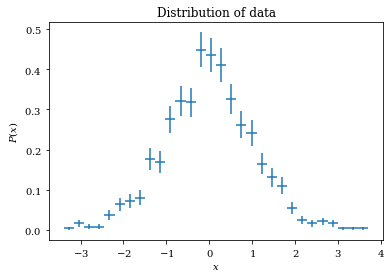

In [10]:
from numpy.random import normal 
from matplotlib.pyplot import xlabel, ylabel, title

data = normal(size=1000)
nbi.hist(data,bins=30,fmt='none')
xlabel('$x$')
ylabel('$P(x)$')
title('Distribution of data');

We can choose the bins by passing the `bin` keyword.  For example, for data roughly exponentially distributed - like the decay of a radioactive source, we often get very few counts at high values, and thus we would like to make the bins _wider_, resulting in non-equidistant bin edges. 

/home/cholm/Work/nbi-python/statistics/nbi_stat.py:351: RuntimeWarning: invalid value encountered in true_divide
  h = h/w/s


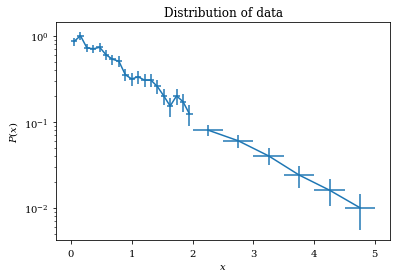

In [11]:
from numpy.random import exponential
from numpy import linspace, hstack
from matplotlib.pyplot import yscale

data = exponential(size=1000)
bins = hstack((linspace(0,2,20,endpoint=True), linspace(2,5,7)))
nbi.hist(data,bins=bins)
yscale('log')
xlabel('$x$')
ylabel('$P(x)$')
title('Distribution of data');

If we need to plot the data in a sub-plot we can pass the keyword `ax` to select the `Axes` object to plot in

/home/cholm/Work/nbi-python/statistics/nbi_stat.py:351: RuntimeWarning: invalid value encountered in true_divide
  h = h/w/s


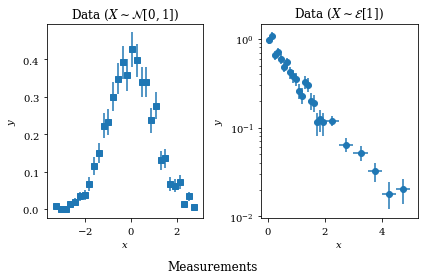

In [12]:
from matplotlib.pyplot import subplots 

fig, ax = subplots(ncols=2)

data = normal(size=1000)
nbi.hist(data,bins=30,ax=ax[0],fmt='s')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].set_title(r'Data ($X\sim \mathcal{N}[0,1]$)')

data = exponential(size=1000)
nbi.hist(data,bins=bins,ax=ax[1],fmt='o')
ax[1].set_xlabel('$x$')
ax[1].set_ylabel('$y$')
ax[1].set_yscale('log')
ax[1].set_title(r'Data ($X\sim \mathcal{E}[1]$)')

fig.suptitle('Measurements',y=0)
fig.tight_layout()

## Multi-dimensional samples 

### `corner_plot`

Generally it is difficult to visualize samples in 2 or more dimensions.  For 2 dimensions one may use _NumPy_'s [`histogram2d`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html) in combination with for example _Matplotlib_'s [`pcolormesh`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html), or even [`hist2d`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist2d.html).  However, one has to be careful in these cases 
- We cannot easily visualize the uncertainties 
- We must be careful to pass `density=True` in all cases to properly normalize the histogram (if not, it is not really a histogram but a bar-chart which isn't really suitable for a continuous varible). 

The module `nbi_stat` provides an alternative representation via the function `corner_plot`.   It is best illustrated by an example 

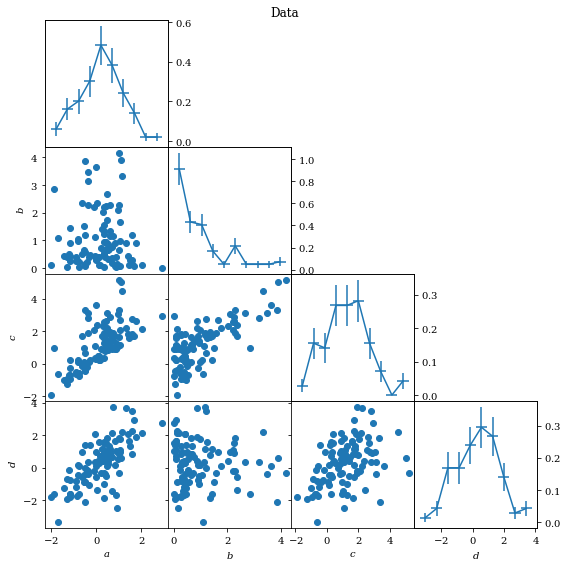

In [13]:
data1 = normal(size=(100,1))
data2 = exponential(size=(100,1))
data3 = data1+data2 
data4 = data1-normal(size=(100,1))
data  = hstack((data1,data2,data3,data4))

fig, *_ = nbi.corner_plot(data,names='auto',fig_kw={'figsize':(8,8)})
fig.tight_layout()
fig.suptitle('Data');

For the four-dimensional sample we see 

- On the diagonal, the distribution in each dimension 
- In the off-diagonal elements, the correlation between all dimensions.  

While representation does not show the "full" distribution, it does illustrate important features of the data. For example, it is clear from the plot above that variables $a$ and $c$ are correlated.  However, for many variables the rendering of the plot can take some time. 

We can customize `corner_plot` in many ways.  For example, we can specify a different drawing method for the diagonal and off-diagonal elements.  In general 

- `diag=`_f_ uses the _callable_ _f_ (typically a function) to draw on the diagonal.  The function will get the sample of a single variable and must plot in the current `Axes`.  It will also receive optional keyword arguments specified by the keyword `dia_kw`. 
- `off`=_f_ uses the _callable_ _f_ (typically a function) to draw in the off-diagonal.  The function will get the sample of two variables as well as keyword arguments specified by `off_kw`.   The callable must draw in the current `Axes` object. 

Many functions in _Matplotlib_ fits these requirements.  For example, one can use `hist2d` for `off`.  However, if needed, one can define a function which illustrates the data best possible. 

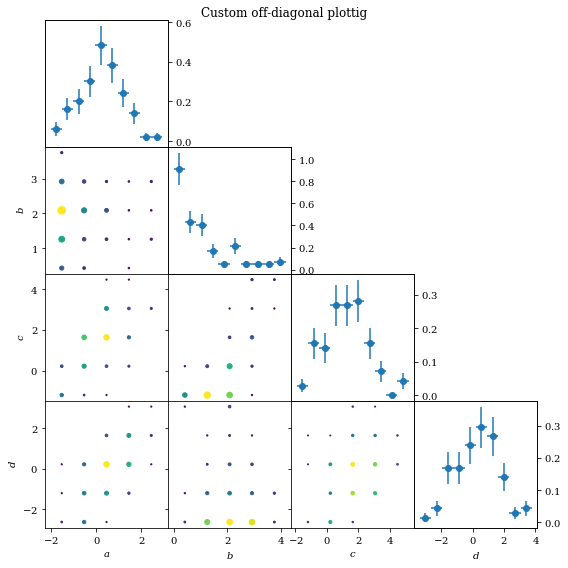

In [14]:
def scathist(x,y,**kwargs):
    from numpy import histogram2d, meshgrid
    from matplotlib.pyplot import scatter
    
    nbins = kwargs.get('nbins',10)
    h, xb, yb = histogram2d(x,y,bins=nbins,density=True)
    xc = (xb[1:]+xb[:-1])/2
    yc = (yb[1:]+yb[:-1])/2
    xx, yy = meshgrid(xc,yc)
    scatter(xx,yy,1000/nbins*h,h)
    
fig, *_ = nbi.corner_plot(data,names='auto',off=scathist,off_kw={'nbins':5},
                          dia_kw={'fmt':'o'},fig_kw=dict(figsize=(8,8)))
fig.tight_layout()
fig.suptitle('Custom off-diagonal plottig');

It is also possible to plot several data sets together. Each data set can be customized by a `dict` following the data. 

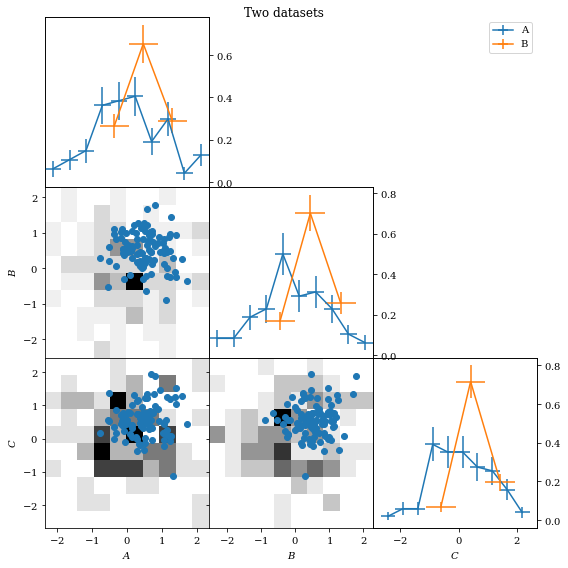

In [15]:
from matplotlib.pyplot import hist2d, scatter

data1 = normal(size=(100,3))
data2 = normal(.5,.5,size=(100,3))
fig, *_ = nbi.corner_plot(data1,{'off':hist2d,'label':'A','off_kw':{'cmap':'Greys'}},
                          data2,'B',{'dia_kw':{'bins':3}},legend=True,names='Alpha',
                          fig_kw=dict(figsize=(8,8)))
fig.tight_layout()
fig.suptitle('Two datasets');

# Rounding results 

## `print_result`

Generally, we do not want to give too many digits on the uncertainty of a result.  Typically we want _one_ significant digit on the least uncertainty and the result given to the same precision (least power of 10 rounded to).  

Suppose we get the value 

    12.3456
    
with the uncertainties 

    1.23456 0.123456 0.0123456
    
from our calculations.  To print the result correctly we can do 

In [16]:
value = 12.3456
uncer = [1.23456, 0.123456, 0.012345]
nbi.print_result(value,uncer)

   12.35 +/-     1.23 +/-     0.12 +/-     0.01


## `format_result` 

If we one to _pretty-print_ using $\mathrm{\LaTeX}$ and give the measured quantity a name we can do 

In [17]:
display(Latex('$'+nbi.format_result(value,uncer,name='x',latex=True)+'$'))

<IPython.core.display.Latex object>

To avoid extracting a common exponent we can add `expo=False`.  We can also set a unit by passing `unit=`, as well as give labels to each uncertainty 

In [18]:
display(Latex('$$'+nbi.format_result(value,uncer,name='x',latex=True,expo=False,unit='u',
                                    dnames=['stat','sys','theory'])+'$$'))

<IPython.core.display.Latex object>

More fine-grained control can be done with `nbi.round_result` and `nbi.round`. 

# Mean, variance, and covariance on the fly 

## `welford_init`, `west_init`, `welford_update`, `west_update` 
To calculate the mean 

$$\overline{x} = \frac{1}{N}\sum_{i=1}^{N} x_i\quad,$$ 

and variance 

$$s^2_x = \frac{1}{N-1}\sum_{i=1}^{N} (x_i - \overline{x})^2\quad,$$ 

or covariance 

$$c_{x,y} = \frac{1}{N-1}\sum_{i=1}^{N} (x_i - \overline{x})(y_i - \overline{y})\quad,$$ 

robustly (i.e., with minimal rounding errors due to machine precision) and on-the-fly (i.e., using a _single_ pass over data), we can use one of the `welford` or `west` families of functions 

- `welford_init` or `west_init` to initialize an appropriate data structure, and one of 
- `welford_update` or `west_update` to update the mean and (co)variance, or 

The `welford...` functions must be used for _unweighted_ samples, while the `west...` functions are used for _weighted_ samples.   Here, we will illustrate the use of both families using the `welford` family.  

First, we initialise our data structure.  We will have 3 variables $x,y,z$ and each observation in our sample will consist of such a 3-tuple.  We will have two data structures - one that has the means and variances, and one with the means and covariances. 

In [19]:
from numpy.random import normal, uniform, exponential
from numpy import array 

mean_var   = nbi.welford_init(3,False)
mean_covar = nbi.welford_init(3,True)

Now let us fill in random observations 

In [20]:
n = 100
for x,y,z in zip(normal(size=n),uniform(size=n),exponential(size=n)):
    obs        = array((x,y,z))
    mean_var   = nbi.welford_update(obs,*mean_var,  ddof=1)
    mean_covar = nbi.welford_update(obs,*mean_covar,ddof=1)
    
print(f'Means:     {mean_var[0]}')
print(f'Variances: {mean_var[1]}')
print(f'Means:     {mean_covar[0]}')
print(f'Covariance:\n{mean_covar[1]}')

Means:     [-0.10274929  0.49175404  1.02384517]
Variances: [0.77153254 0.08887651 1.2050375 ]
Means:     [-0.10274929  0.49175404  1.02384517]
Covariance:
[[ 0.77153254 -0.01793416  0.10483751]
 [-0.01793416  0.08887651  0.00944052]
 [ 0.10483751  0.00944052  1.2050375 ]]


The _NumPy_ functions [`numpy.mean`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) and [`numpy.var`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html) similarly calculates the mean and variance of sample but requires that the _whole_ sample is available, while the above methods allow for incremental updates.   The two _NumPy_ function will be faster for a _whole_ sample, but does not provide more accurate calculations. 

## `Welford`, `West` 

The module `nbi_stat` also provides Object Oriented statistical calculations through the classes `Welford` and `West` 

In [21]:
mean_var   = nbi.Welford(3)
mean_covar = nbi.Welford(3,True)

n = (100,1)
data = hstack((normal     (size=n),
               uniform    (size=n),
               exponential(size=n)))
for obs in data:
    mean_var.update(obs)

mean_covar += data
print(mean_var,mean_var.n)
print(mean_covar)

[[-0.21374692  0.11019054  1.21419551]
 [ 0.50323772  0.02671057  0.07134547]
 [ 1.02074505  0.10955489  1.20022749]] 100
[[-0.21374692  0.11019054  1.21419551 -0.0114984  -0.00248777]
 [ 0.50323772  0.02671057 -0.0114984   0.07134547 -0.02755563]
 [ 1.02074505  0.10955489 -0.00248777 -0.02755563  1.20022749]]


# Histogramming 

The _NumPy_ function [`histogram`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) is a bit cumbersome in that it 

- Returns the bin count or bin density, but not the uncertainties, leaving that task to the user.  
  while it is not difficult to do, it is something that is easy to mess up 
- Returns the bin edges rather than the bin centres and possible widths.  Again, it is not difficult to 
  calculate the bin centres and widths, but it is easy to mess it up. 
- While _NumPy_'s `histogram` allows for weight, it _only_ allows for _frequency_ weights (for more, see [Statistics Overview](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)), which makes it less attractive for cases where the weights may represent efficiencies or the like. 

## `histogram` 

For these reasons `nbi_stat` define the drop-in function `histogram`.  This function differs from the _NumPy_'s version by 

- The histogram bin values are _always_ normalized to the bin width so that the bin integral (area) 
  is proportional to the probability. 
- The function returns 
  - bin values $h_i$
  - bin centres $b_i$ 
  - bin widths  $w_i$
  - bin uncertainties $e_i$  
  (_NumPy_'s `histogram` returns bin values and bin edges only)
- Allows for non-frequency weights (and calculates the uncertainties) 
- The histogram values are _not_ normalised to the number of observations $N$, meaning that the total integral

  $$N_{\mathrm{acc}} = \sum_{i=1}^{n} h_i w_i\quad,$$
  
  is equal to the number of observations within the range of the histogram - that is, the histogram
  represents a _number density_.  If one want to normalise to this histogram one should pass the option
  `normalize=True` thus turning the histogram into a _probability density_.  

We will illustrate this.  First, a simple histogram with no weights and equidistant bins 

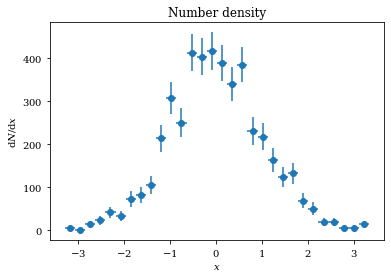

In [22]:
from matplotlib.pyplot import errorbar 

data = normal(size=1000)
h, b, w, e = nbi.histogram(data,30)

errorbar(b,h,e,w/2,fmt='o')

xlabel('$x$')
ylabel('$\mathrm{d}N/\mathrm{d}x$')
title('Number density');

We can calculate the integral and uncertainty easily 

In [23]:
from numpy import sqrt 

i = (h*w).sum()
ie = sqrt(((e*w)**2).sum())

nbi.print_result(i, [ie])

    1000 +/-       30


Let us do the same, but this time normalising to the integral 

    1.00 +/-     0.03


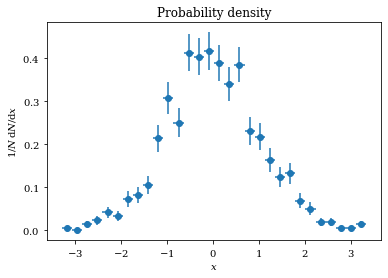

In [24]:
h, b, w, e = nbi.histogram(data,30,normalize=True)

errorbar(b,h,e,w/2,fmt='o')

xlabel('$x$')
ylabel('$1/N\,\mathrm{d}N/\mathrm{d}x$')
title('Probability density')

i = (h*w).sum()
ie = sqrt(((e*w)**2).sum())
nbi.print_result(i, [ie])

Finally, we will do an example with _non_-frequency weights 

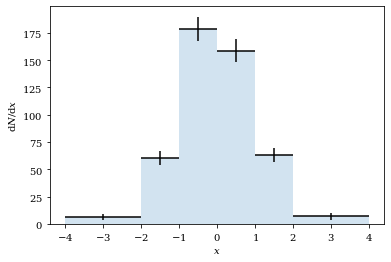

In [25]:
from matplotlib.pyplot import bar 
from numpy.random import random

weights    = random(len(data))
h, b, w, e = nbi.histogram(data,bins=[-4,-2,-1,0,1,2,4],weights=weights,frequency=False)
bar(b,h,yerr=e,xerr=w/2,width=w,alpha=.2)
xlabel(r"$x$")
ylabel(r"$\mathrm{d}N/\mathrm{d}x$");

## `init_histogram`, `fill_histogram`, `fini_histogram` 

Both the _NumPy_ and `nbi_stat` functions `histogram` assumes that the full sample is available for calculations. However, often we are accumulating histograms _on-line_ meaning we _fill_ new observations into the histogram and then immediately forget about the number.   For long-run programs or large data sets we can gain a bit by doing on-line updates. 

The function `init_histogram` is a litle like `histogram`, exept it does not do any updating.  It declares the structures need, though 

In [26]:
hist = nbi.init_histogram(linspace(-3,3,31))

We then fill observations into the histogram with `fill_histogram`.   We can fill with weights.  However, to fill with _non_-frequency weights we must initialize with the option `weights=True`.  Continuing from above, we fill without weights 

In [27]:
for _ in range(1000):
    hist = nbi.fill_histogram(normal(),*hist)

To finalize the histogram and extract 
- bin values $h_i$ 
- bin centres $b_i$
- bin widths $w_i$ 
- bin uncertainties $e_i$
we call `fini_histogram`. 

In [28]:
h, b, w, e = nbi.fini_histogram(*hist)

Let us plot it

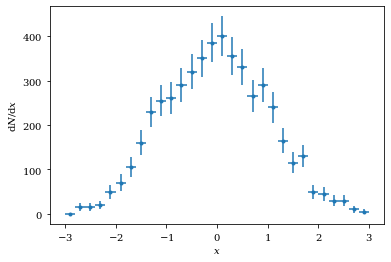

In [29]:
errorbar(b,h,e,w/2,".",label="Data")
xlabel(r"$x$")
ylabel(r"$\mathrm{d}N/\mathrm{d}x$");

With weights, we need to make the histogram with structure with the option `weight=True`

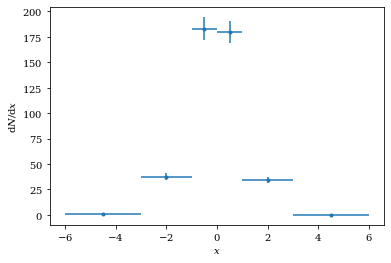

In [30]:
from numpy import array 

hist = nbi.init_histogram([-6,-3,-1,0,1,3,6],weighted=True)
for x,w in zip(normal(size=1000),random(size=1000)):
    hist = nbi.fill_histogram(x,*hist,w)

h, b, w, e = nbi.fini_histogram(*hist)
errorbar(b,h,e,w/2,".",label="Data")
xlabel(r"$x$")
ylabel(r"$\mathrm{d}N/\mathrm{d}x$");

## `Histogram` 

Sometimes it can feel more comfortable to have a full object for complicated such as histograms.  For that reason, the `nbi_stat` defines the class `Histogram`.  It is similar to the function `init_histogram`, `fill_histogram`, and `fini_histogram` (in fact, those functions are used behind the scenes).   An example to illustrate its use 

In [31]:
from numpy import zeros_like
from matplotlib.pyplot import fill_between

hist = nbi.Histogram(linspace(-3,3,31),True)
for _ in range(1000):
    hist.fill(normal(), random())
hist.finalize()
fill_between(hist.centers,
             zeros_like(hist.heights),
             hist.heights,
             step='mid',alpha=.5)
errorbar(hist.centers,
         hist.heights,
         hist.uncertainties,
         hist.widths/2,
         '.', label='Non-frequency weighted')
xlabel('$x$')
ylabel('$\mathrm{d}N/\mathrm{d}x$');

# Sampling a probability density function 

## `eval_cdf` 

Suppose we have some function $f:\mathbb{X}\rightarrow\mathbb{Y}$ from which we would like to draw random samples.  If the function is one of the regular distributions we can often find it in _NumPy_'s `numpy.random` or _SciPy_'s `scipy.stats` packages.  

Sometimes, however, the distribution $f$ we are interested in does not exist in some readily available package.  In that case one can use `nbi_stat`'s `eval_cdf` and `sample_pdf` to draw such random numbers.  `eval_cdf` evaluates the _cumulative distribution function_ (CDF) $F$ defined by 

$$F(x) = \int_a^x\mathrm{d}x'\,f(x')\quad,$$ 

where $a$ is the lower bound of $X$ and $f$ is the _probability density function_ (PDF).  `eval_cdf` build up the CDF numerically by integrating $f$ in steps 

$$I_n = \int_{x_{n-1}}^{x_{n}}\mathrm{d}x'\,f(x')\quad,$$ 

and then calculate the cumulative sum to give 

$$F_n = \sum_{i=0}^{n} I_i\quad.$$ 

Typically, one would require $f$ to be normalized on $X$ 

$$\int_X\mathrm{d}x\,f(x) = 1\quad,$$ 

but we relax that requirement in `eval_cdf` since we will normalize explicitly by dividing all $F_n$ by $F_N$ where $N$ is the last point. 

As an example, take the function that describes invariant mass of a resonance decay over some background 

$$f(E;a_1,a_2,a_3,A,\Gamma,E_0) =
a_1+a_2x+a_3x^2+A\frac{\Gamma/(2\pi)}{(E-E_0)^2+(\Gamma/2)^2}\quad,$$

with 

$$
\begin{split}
a_1 &= -0.3\\
a_2 &= 73\\
a_3 &= -18\\
A   &= 33.8\\
\Gamma &= 0.138\,\mathrm{Ge\!V}\\
E_0 &= 0.9667\,\mathrm{Ge\!V}\quad.
\end{split}
$$ 

We want to sample this distribution over $E\in[0,3]\,\mathrm{Ge\!V}$ in 51 steps. 

In [32]:
from numpy import pi 
def pdf(E,a1=-.3,a2=73,a3=-18,A=33.8,Gamma=0.138,E0=0.9667):
    return a1+a2*E+a3*E**2+A*(Gamma/(2*pi))/((E-E0)**2+(Gamma/2)**2)

x   = linspace(0,3,51)
cdf = nbi.eval_cdf(pdf,x)

We can choose as many steps as we want, but in general we should choose _just_ enough that we have enough resolution in the CDF to do reasonable sampling.  That is, the PDF should be roughly linear between sampling points. Some trial-and-error may be involved when choosing the number of steps.  In `sample_pdf` we will do linear interpolation between the sample points.    

Let us draw up the PDF and the CDF 

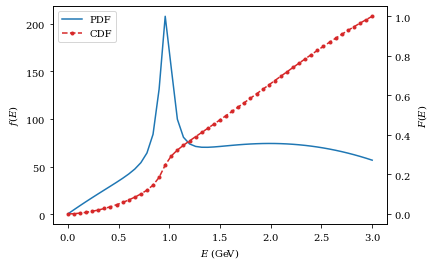

In [33]:
from matplotlib.pyplot import gca 

ax  = gca()
lp  = ax.plot(x,pdf(x),label='PDF');
tax = gca().twinx()
lc  = tax.plot(x,cdf,'.--',label='CDF',color='C3')

ax.set_xlabel(r'$E\ (\mathrm{Ge\!V})$')
ax.set_ylabel(r'$f(E)$')

tax.set_ylabel(r'$F(E)$')

ax.legend([lp[0],lc[0]],[lp[0].get_label(),lc[0].get_label()],
          loc='upper left');

To draw random variables from $f$ we will pick a uniform random number $r\sim\mathcal{U}[0,1]$ and then solve 

$$F(E) - r = 0\quad.$$

Of course, we will do so numerically by look-up in our calculated CDF. 

## `sample_pdf` 

Let us generate 2000 samples from the PDF above 

In [34]:
samples = nbi.sample_pdf(random(2000),x,cdf)

Let us draw this with a histogram 

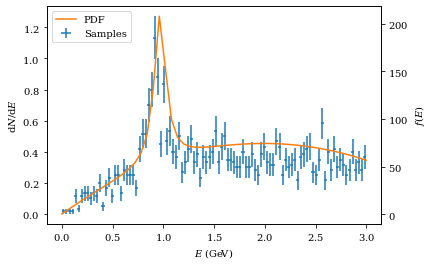

In [35]:
ax  = gca()
ha  = nbi.hist(samples,bins=linspace(0,3,101),fmt='none',
               label='Samples')
tax = ax.twinx()
lp  = tax.plot(x,pdf(x),label='PDF',color='C1')

ax.set_xlabel(r'$E\ (\mathrm{Ge\!V})$')
ax.set_ylabel(r'$\mathrm{d}N/\mathrm{d}E$')

tax.set_ylabel(r'$f(E)$')

ax.legend([lp[0],ha],[lp[0].get_label(),ha.get_label()],
          loc='upper left');

Note, in the plot above, the two ordinate ($y$) scales are independent and we should _not_ expect the PDF line to lie on top of the sample points.  However, we _should_ expect the curves to have the same shape, which they do.   Note, that we have made a finer binning in our histogram than what we determined our CDF with, but we still get reasonable samples.  That is because `sample_pdf` does linear interpolation between the determined CDF points. 

If our PDF has distinct features in some region of the domain (e.g., sharp peaks or the like), one can define the CDF evaluation points to be closer in the region of that feature.  For example 

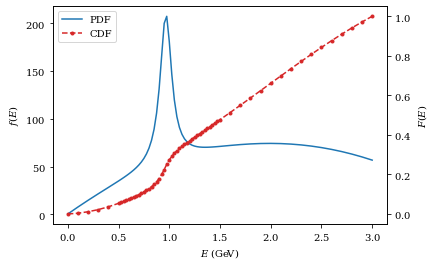

In [36]:
x   = hstack((linspace(0,.5,5,endpoint=False),
              linspace(.5,1.5,40,endpoint=False),
              linspace(1.5,3,16)))
cdf = nbi.eval_cdf(pdf,x)

ax  = gca()
lp  = ax.plot(x,pdf(x),label='PDF');
tax = gca().twinx()
lc  = tax.plot(x,cdf,'.--',label='CDF',color='C3')

ax.set_xlabel(r'$E\ (\mathrm{Ge\!V})$')
ax.set_ylabel(r'$f(E)$')

tax.set_ylabel(r'$F(E)$')

ax.legend([lp[0],lc[0]],[lp[0].get_label(),lc[0].get_label()],
          loc='upper left');

In this way, our sampling near the peak will be much more fine grained 

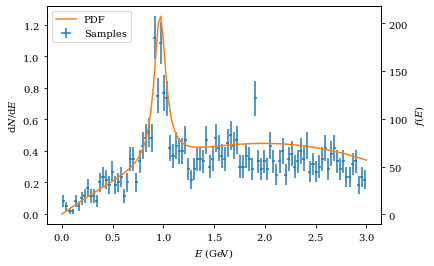

In [37]:
samples = nbi.sample_pdf(random(2000),x,cdf)

ax  = gca()
ha  = nbi.hist(samples,bins=linspace(0,3,101),fmt='none',
               label='Samples')
tax = ax.twinx()
lp  = tax.plot(x,pdf(x),label='PDF',color='C1')

ax.set_xlabel(r'$E\ (\mathrm{Ge\!V})$')
ax.set_ylabel(r'$\mathrm{d}N/\mathrm{d}E$')

tax.set_ylabel(r'$f(E)$')

ax.legend([lp[0],ha],[lp[0].get_label(),ha.get_label()],
          loc='upper left');

# Propagation of uncertainties 

## `propagate_uncertainty` 

Generally, if we measure the quantities $x_1,\ldots,x_n$ and determine some estimator $y$ as 

$$y = f(x_1,...,x_n)\quad,$$ 

we need to propagate the uncertainties of the measured quantities $\delta_1,\ldots,\delta_n$ to get the final uncertainty $\delta_y$ on $y$.  The standard formula is given by 

$$\delta_y^2 = \sum_{i=1}^{n}\left(\frac{\partial f}{\partial x_i}\right)^2\delta_i^2\quad,$$ 

where we explicitly ignore correlations between the measured quantities $x_1,\ldots,x_n$. 

The module `nbi_stat` allows us to evaluate this formula _numerically_ using the function `propagate_uncertainty`  Let us take the example of 

\begin{align*}
  x_1 &= 1.3\pm0.1\\
  x_2 &= 0.22\pm0.05\\
\end{align*}

and 

$$ y = f(x_1,x_2) = x_1^{x_2}\quad.$$

In [38]:
x   = [1.3, 0.22]
dx  = [0.1, 0.05]
y   = x[0]**x[1]
dy2 = nbi.propagate_uncertainty(lambda x: x[0]**x[1],x,dx)
nbi.print_result(y,sqrt(dy2))

    1.06 +/-     0.02


Note, that `propagate_uncertainty` returns the _square_ uncertainty.  

An alternative to this numerical evaluation is to evaluate the derivatives _symbolically_ using [_SymPy_](https://sympy.org).   Let us do that for the above 

In [39]:
from sympy import symbols, Eq, latex
x1, x2 = symbols('x_1 x_2',real=True)
d1, d2 = symbols('d_1 d_2',real=True)
y      = x1**x2 
dy2    = (y.diff(x1))**2*d1**2 + (y.diff(x2))**2*d2**2 
Eq(symbols('d_y')**2, dy2.simplify())

Eq(d_y**2, x_1**(2*x_2 - 2)*(d_1**2*x_2**2 + d_2**2*x_1**2*log(x_1)**2))

We can turn this expression into something we can use numerically using _SymPy_'s `lambdify` function.  We do that here for both `dy2` and `y` to evaluate our result 

In [40]:
from sympy import lambdify
ny   = lambdify((x1,x2),y)
ndy2 = lambdify((x1,x2,d1,d2),dy2)
ry   = ny(*x)
rdy2 = ndy2(*x,*dx)
nbi.print_result(ry,sqrt(rdy2))

    1.06 +/-     0.02


We see that our numerical evaluation using `propagate_uncertainty` gave the same answer as by direct evaluation of the formulas.  Behind the scenes, `propagate_uncertainty` uses a simple formula for evaluating the derivatives numerically 

$$\frac{\partial f(x_1,\ldots,x_i,\ldots,x_n)}{\partial x_i} \approx 
\frac{f(x_1,\ldots,x_i+s_i,\ldots,x_n) - f(x_1,\ldots,x_i-s_i,\ldots,x_n)}{2s_i}\quad,$$ 

where $s_i$ is the step size normally set to $d_i$.  However, if the step size is too small or too large, this approximation may not be stable.  We can therefor supply another step size should that be needed. 

If any $x_i,x_j$ are correlated, then we must add 

$$\frac{\partial f}{\partial x_i}\frac{\partial f}{\partial x_j}\delta_i\delta_j\rho_{ij}\quad,$$ 

to the above sum.  Here, $\rho_{ij}$ is the correlation coefficient between the $x_i$ and $x_j$ 

\begin{align*}
\rho_{ij} 
&= \frac{\sum_{k=1}^N (x_{i_k} - \overline{x}_i)(x_{j_k} - \overline{x}_j)}{
  \sqrt{\sum_{k=1}^N (x_{i_k}-\overline{x}_i)^2}\sqrt{\sum_{k=1}^{N}(x_{j_k}-\overline{x}_j)^2}}\\
&= \frac{c_{ij}}{\sqrt{s^2_i s^2_j}}\quad,
\end{align*}

where $c_ij$ is the covariance between $x_i$ and $x_j$ and $s^2_i,s^2_j$ are the variances of $x_i,x_j$, respectively.   Since $\delta_i^2=s_i^2$, and with the _Jacobian_ given by 

$$J_i = \frac{\partial f}{\partial x_i}\quad,$$ 

we can write up propagation of uncertainty in matrix form as 

$$\delta^2 = J^T C J 
= 
\begin{bmatrix}
  \frac{\partial f}{\partial x_1}&
  \frac{\partial f}{\partial x_2}&
  \cdots&
  \frac{\partial f}{\partial x_n}
\end{bmatrix}
\begin{bmatrix} 
  c_{11} & c_{12} & \cdots c_{1n}\\
  c_{21} & c_{22} & \cdots c_{2n}\\
  \vdots & \vdots & \ddots \vdots\\
  c_{n1} & c_{n2} & \cdots c_{nn}
\end{bmatrix}
\begin{bmatrix}
  \frac{\partial f}{\partial x_1}\\
  \frac{\partial f}{\partial x_2}\\
  \vdots\\
  \frac{\partial f}{\partial x_n}
\end{bmatrix}
\quad,$$ 

where $J$ is the Jacobian vector and $C$ is the covariance matrix. 

`propagate_uncertainty` can handle this case as well.  Let us continue the example from above, with the additional information that 

$$\rho_{12} = 0.4\quad.$$ 

Our covariance matrix is then 

$$C = \begin{bmatrix} 0.01 & 0.001\\ 0.001 & 0.0025\end{bmatrix}\quad,$$ 

which we pass to the function 

In [41]:
rho = 0.4
c   = [[dx[0]**2,        rho*dx[0]*dx[1]],
       [rho*dx[1]*dx[0], dx[1]**2]]
dy2 = nbi.propagate_uncertainty(lambda x:x[0]**x[1],x,c)
nbi.print_result(x[0]**x[1],sqrt(dy2))

    1.06 +/-     0.03


Let us calculate the same symbolicly 

In [42]:
from sympy import Matrix
rho = symbols('rho',real=True)
C = Matrix([[d1**2,     rho*d1*d2],
            [rho*d2*d1, d2**2]])
J = Matrix([[y.diff(x1)],[y.diff(x2)]])
Eq(symbols('d_y'),(J.T * C * J)[0])

Eq(d_y, x_1**x_2*(d_1*d_2*rho*x_1**x_2*x_2/x_1 + d_2**2*x_1**x_2*log(x_1))*log(x_1) + x_1**x_2*x_2*(d_1**2*x_1**x_2*x_2/x_1 + d_1*d_2*rho*x_1**x_2*log(x_1))/x_1)

Again, we will use `lambdify` to evaluate this numerically 

In [43]:
ndy2 = lambdify((x1,x2,d1,d2,rho),(J.T * C * J)[0])
dy2  = ndy2(*x,*dx,0.4)
nbi.print_result(x[0]**x[1],sqrt(dy2)) 

    1.06 +/-     0.03


Similarly, we can evalutate the uncertainty on a function $f$ over some range $x\in X$ with the parameters $p$ due to the uncertainty in the parameters $p$. 

Here, we will take 

\begin{align*}
  f(x) &= a+bx\\
  a    &= 1 \pm 0.1\\
  b    &= 1 \pm 0.2\\
  x    &\in [0,1]\quad.
\end{align*}

In [44]:
def f(x,a,b):
    return a + b * x 

a, b, da, db = 1, 1, .1, .2 
x   = linspace(0,1,11)
y   = f(x,a,b)
dy2 = nbi.propagate_uncertainty(lambda p : f(x,*p),[a,b],[da,db])

from matplotlib.pyplot import plot, legend

plot(x,y,label='$f(x)$')
fill_between(x,y-sqrt(dy2),y+sqrt(dy2),label=r'$\delta f(x)$',
             color='y',alpha=.5)
xlabel(r'$x$')
legend();

We will use this feature later in the function `plot_fit` 

# Curve fitting 

Curve fitting is procedure by which we adjust parameters of a function so that it comes closest possible to the data.  Note, we say we 

> fit a function to data 

_not_ the converse (_fit data to a function_), since data by definition is _true_ and the function is our _hypothesis_.

In general, there are three types of curve fitting 

- Maximum-Likelihood fit of $f$ to observed samples (not binned) 
- Linear _least squares_ fit of $f$ to a distribution of observations (typically binned) 
- Non-linear _least squares_ fit of $f$ to a distribution of observations (typically binnned) 

We will give a few more details on each type of fit below. 

[_SciPy_](https://scipy.org) and _NumPy_ provides a number of ways to perform curve fits. 

- For Maximum-Likelihood fits we can use `scipy.optimize.minimize` 
- For linear least squares we can use `numpy.linalg.lstsq` 
- For non-linear least squares we can use `scipy.optimize.curve_fit` 

Each of these have their own caveats and thus `nbi_stat` provides 

- `mle_fit` for Maximum-Likelihood fits 
- `lin_fit` for linear least squares fits 
- `lsg_fit` for non-linear least squares fits (aliased to `curve_fit`)

as well as the unified interface `fit` which can perform all of the above.  In general, we want the fit procedure to yield the values of the adjusted parameters $p$ _and_ the uncertainties $\delta p$ on these.  The uncertainties of the parameters $p$ are given by the diagonal of the _covariance matrix_ (or inverse Hessian matrix) of the fit.  The off-diagonal elements represents the _correlation_ between the parameters. Thus, for each type of procedure we want to get two outputs 

- `p` the adjusted parameter values 
- `cov` the covariance matrix of the parameters 

The three `nbi_stat` functions mentioned above, as well as the interface `fit`, all return these values.  

Let us look at some examples. 

## `lin_fit` 

A linear function, for the purpose of curve fitting, is a function that is _linear in the parameters $p$_.  That is, any function that we can write on the form 

$$f(x) = \sum_{i=1}^{n} p_i f_i(x)\quad,$$ 

where _non_ of the $n$ $f_i$ depend on $p$.   Note, we have made no claim about linearity in terms of the independent variable $x$ - that is not relevant to curve fitting.  

For linear functions there exists an _exact_ solution to curve fitting (see also [Statistics Overview](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)) which is calculated by `lin_fit`.  That function expects the function to fit to the data to be given in terms of the term functions $f_i$. 

Let us consider the function 

$$f(x;a,b) = a + bx\quad,$$ 

with the free parameters $a$ and $b$.  Let us fit that to some generated data.  First, we generate our data and take a look at it.

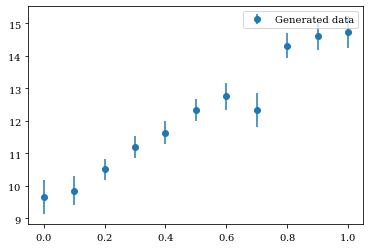

In [45]:
x = linspace(0,1,11)
e = normal(.5,.1,size=len(x))
y = 5*x + 10 + normal(0,.5,size=len(x))
errorbar(x,y,e,fmt='o',label='Generated data')
legend();

We perform our linear fit to the data and print out the resulting parameter values and uncertainties.  Note, we specify our function in terms of the individual term functions $f_i$, which are 

$$ f_a(x) = 1\quad f_b(x) = x$$

In [46]:
from numpy import ones_like,diagonal
f = [lambda x: ones_like(x), lambda x : x]
p, cov = nbi.lin_fit(f,x,y,e)
for pv, pe, pn in zip(p,sqrt(diagonal(cov)),['a','b']):
    print(nbi.format_result(pv,[pe],name=pn,expo=None,latex=False))

a=9.5 +/- 0.2
b=5.5 +/- 0.4


We can use the function `format_data_table` to print out the parameters 

In [47]:
out = [[(pv,pe)] for pv,pe in zip(p,diagonal(cov))]
display(Latex(nbi.format_data_table(out,rows=['a','b'],title='Fit',
                                    columns=[r'\mathrm{Found}'])))

<IPython.core.display.Latex object>

## `chi2nu` 

To evaluate the _goodness-of-fit_ of a least-squares (linear or non-linear) we must evaluate 

\begin{align*}
  \chi^2 &= \sum_{i=1}^{N} \frac{\left(y_i - f(x_i;p)\right)^2}{\delta_i^2}\\
  \nu    &= N-n\quad,
\end{align*}
where $n$ is the number of parameters $p$.  

This is the _square_ in least square - the $\chi^2$, and $\nu$ is the number of degrees of freedom (sometimes denoted n.d.f. or similar).  The module `nbi_stat` defines the function `chi2nu` to evaluate this 

In [48]:
from numpy import dot, sum 

ff = lambda x,*p : dot(p, [fi(x) for fi in f])
chi2, nu = nbi.chi2nu(x,y,ff,p,e)
print(f'chi^2: {chi2:.1f}\nnu:    {nu}')

chi^2: 5.7
nu:    9


As a rule-of-thumb, we say 

$$\chi^2/\nu \approx 1\quad,$$ 

signifies a good fit.   

In [49]:
print(f'chi^2/nu: {chi2/nu:.2f}')

chi^2/nu: 0.63


In this example we see $\chi^2\nu < 1$ which typically indicates and overestimation of the uncertainties on data. 

A more _correct_ way of evaluating the goodness-of-fit is to calculate the $\chi^2$ probability for the given $\nu$.   Without going into further details (see [Statistics Overview](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)) we state we can calculate this probability by `scipy.stats.chi2.sf` and that we expect this to be around $50\%$ for a good fit.

In [50]:
from scipy.stats import chi2 as schi2

print(f'P(chi^2;nu) = {schi2.sf(chi2,nu)*100:.1f}%')

P(chi^2;nu) = 77.1%


We can add this information to the table above 

In [51]:
out += [[chi2/nu],[schi2.sf(chi2,nu)]]
display(Latex(nbi.format_data_table(out,rows=['a','b',r'\chi^2/\nu','p'],
                                    columns=[r'\mathrm{Found}'])))

<IPython.core.display.Latex object>

## `plot_fit` 

We can plot our data, the fit, and some summary information using the function `plot_fit` (or the alias `fit_plot`) from the `nbi_stat` module.  

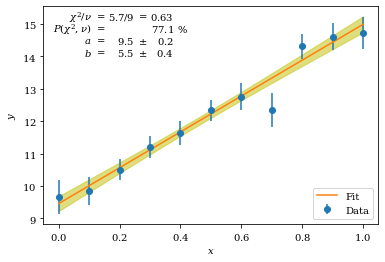

In [52]:
nbi.plot_fit(x,y,e,ff,p,cov,
             band=True,
             data={'fmt':'o','label':'Data'},
             fit={'label':'Fit'},
             table={'loc':'upper left'},
             legend={'loc':'lower right'},
             parameters=['a','b']);
xlabel('$x$')
ylabel('$y$');

Here, we will not go into all the possible ways to customize the appearance of the plot.  We will, however, use this function to illustrate fits, and various examples will be given. 

The individual parts of the plot is drawn by the function `plot_fit_func` and `plot_fit_table` which can be used on their own too. 

## `plot_nsigma_contour` 

To further investigate the result or our fits, we may want to draw the _parameter contours_.  We can use the function `plot_nsigma_contour` to do so 

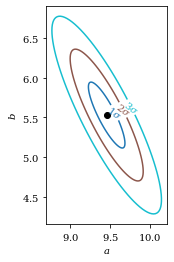

In [53]:
nbi.plot_nsigma_contour(p,cov,[1,2,3],pnames=['a','b'])
gca().set_aspect(1)

The plot above shows the contours where the value of $\chi^2$ would change by one, two or three units.  In other words, within a contour the fit give more or less equivalent results.  From this, we see that the incline of the ellipse is related to how correlated the parameter values are.  For full correlation, these ellipse collapse to more or less to a line, while for no correlation the shapes are more circular. 

Before we go on to the next topic, we will store the fitted function and the data for later use (see [below](#LLSQ)).

In [54]:
llsq = dict(x=x,y=y,ey=e,f=f,g=ff)

## Linear functions are more than you think

As stated earlier, a linear function is any function that is linear in the parameters 

$$f(x;p) = \sum_{i=1}^{n} p_i f_i(x)\quad,$$ 

which means that sometimes we can manipulate our functional expression so that it can be written on this form. 

As an example, consider the function 

$$f(x;a,b) = ax^b\quad,$$ 

which off-hand does not seem linear in the parameters.  However, if we take the logarithm on both sides we find 

$$\log f(x) = \log a + b\log x = g(\log x,\log a,b)\quad,$$ 

which is clearly linear in $\log a$ and $b$.   First, we generate some data over $x\in[1,10]$ with 

\begin{align*}
  b &= 0.3\\
  a &= \frac{b+1}{10^{b+1}-1}\quad.
\end{align*}

In [55]:
l = 10
b = 0.3
a = (b+1)/(l**(b+1)-1)
x = linspace(1,l,20)
r = ((a+(b+1)*random(size=8000))/a)**(1/(b+1))

We histogram our 8000 samples 

In [56]:
h,c,w,e  = nbi.histogram(r,linspace(1,l,20+1),normalize=True)

Next, we define our function $g$ in terms of terms. Our terms are 

$$g_a(\log x) = 1\quad g_b(\log x) = \log x\quad.$$

In [57]:
g = [lambda logx: ones_like(logx), lambda logx: logx]

We are now ready to perform our fit, passing the histogram bin centres $c_i$, values $h_i$, and uncertainties $e_i$ as our data. 

In [58]:
from numpy import log, ones_like, exp

p, cov = nbi.lin_fit(g,log(c),log(h),e)

f = lambda x,loga,b: exp(loga)*x**b
x = linspace(c[0]-w[0],c[-1]+w[-1],20)
y = f(x,*p)
nbi.plot_fit(c,h,e,f,p,cov,
             band=False,
             parameters=[r'\log(a)', 'b'],
             xeval=x,
             data=dict(fmt='none',xerr=w/2),
             table=dict(loc='upper left'))
    
dly2 = nbi.propagate_uncertainty(lambda p: dot(p,[gi(log(x)) for gi in g]),p,cov)
fill_between(x,y+sqrt(dly2),y-sqrt(dly2),color='y',alpha=0.5,label='Uncertainty');

Note, we have turned off the automatic band drawing (`band=False`) here, since the calculate uncertainty band would be wrong due to our transformation of variable ($x\rightarrow\log x$).  We do draw it ourselves though using the function `propagate_uncertainty` from the `nbi_stat` module. 

## `lsq_fit` 

The _SciPy_ function `scipy.optimize.curve_fit` does the right thing in most cases, and we could often just use that.  However, it does have one significant short-coming which we will get to in a minute.  For this reason, we have the drop-in function `lsq_fit` - aliased as `curve_fit` - in `nbi_stat` which we will use here. 

A non-linear least squares fit is performed by minimizing the $\chi^2$ (see [above](#chi2nu)).  If our fitted function is _not_ linear in the parameters there is in general _no_ analytic solution to the problem and we must use numerical methods to solve it.  The exact algorithms used for the $\chi^2$ minimization are many and will be treated as _black-box_ here, but users are encouraged to familiarize themselves with a least one such algorithm to get a idea about what is going on (an example of one such algorithm _gradient descent_ is available in [Statistics Overview](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)). 

Let us do an example.  Here, we assume we have measurements of the invariant mass 

$$E_0^2 = (E_1 + E_2)^2 - \|p_1 + p_2\|^2\quad,$$ 

in a two-particle decay where $(E,p)$ is the energy and momentum of the decay products.  We want to estimate the rest mass $E_0$ and width $\Gamma$ of a resonance using the function 

$$f(x;a_1,a_2,a_3,A_0,\Gamma,E_0) = a_1+a_2x+a_3x^2+A_0\frac{\Gamma/(2\pi}{(E_0-x)^2+(\Gamma/2)^2}\quad,$$ 

where the first three terms model the background and the last term is the Cauchy (or Lorentzian) distribution.  Let us first draw the data we want to fit to. 

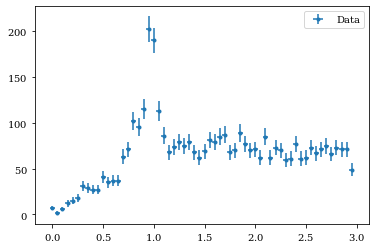

In [59]:
y = [ 7,  2,  6, 12,  15,  18,  31,  29,  27,  27, 41, 35,
     37, 37, 63, 71, 102,  95, 115, 202, 190, 113, 86, 68,
     74, 79, 75, 79,  68,  62,  69,  81,  79,  85, 87, 68,
     70, 89, 77, 70,  71,  62,  85,  62,  73,  70, 59, 61,
     77, 61, 62, 73,  67,  71,  75,  66,  73,  71, 71, 49]
x = linspace(0,3,len(y),endpoint=False)
ey = sqrt(y)
ex = (x[-1]-x[0])/len(x)/2
errorbar(x,y,ey,ex,'.',label='Data')
legend();

Next, we define the function to fit to the data. 

In [60]:
from numpy import pi 

def f(x,a1,a2,a3,a0,gamma,e0):
    return a1+a2*x+a3*x**2+a0*(gamma/(2*pi))/((x-e0)**2+(gamma/2)**2)

To use `curve_fit` we need to make an initial guess at the parameter values $p_0$.  Typically, it doesn't matter much what this guess is _as long as we do not give values that result in infinities or not defined_.  However, if one has quickly oscillating data some care has to be taken to get, for example, the frequency right.  Here, we will give conservative estimates for the parameters based on visual inspection of the data above 

\begin{align*}
  a_1 &= 0    & a_2    &= 0   & a_3 &= 0\\
  A_2 &= 1    & \Gamma &= 0.1 & E_0 &= 1\quad.
\end{align*}

Note, we also define some settings for the parameters in the dictionary `pars` 

In [61]:
p0   = [0,0,0,1,.1,1]
pars = ["a_1","a_2","a_3","A_0",
        {'label':r'\Gamma','unit':'GeV'},
        {'label':'E_0',    'unit':'GeV'}] 

We are now ready to perform our fit 

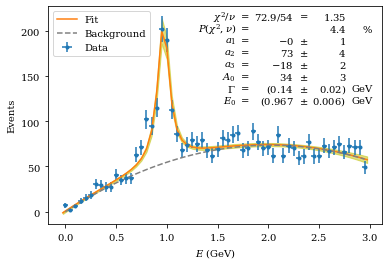

In [62]:
p, cov = nbi.lsq_fit(f,x,y,p0,ey)  # or nbi.curve_fit
nbi.plot_fit(x,y,ey,f,p,cov,nsig=1,
             parameters=pars,
             legend=False,
             data={"label":"Data","fmt":".",'xerr':ex},
             fit={"label":"Fit"})
plot(x,p[0]+p[1]*x+p[2]*x**2,'--',color='grey',label='Background')
xlabel("$E$ (GeV)")
ylabel("Events")
legend(loc='upper left');

Let us plot the parameter contours of this fit 

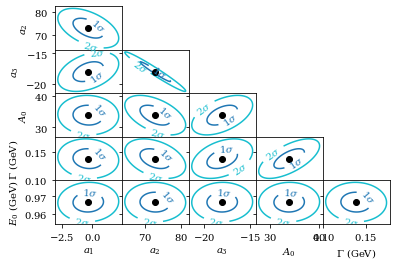

In [63]:
nbi.plot_nsigma_contour(p,cov,[1,2],parameters=pars,
                        fig_kw={'figsize':(8,8)})

## Residuals 

Suppose we would like to see the residuals 

$$r_i = \frac{y_i-f(x_i;p)}{\delta_i}\quad,$$ 

of the fit.  We can easily evaluate these 

In [64]:
r = (y - f(x,*p)) / ey 

Now, we would like to plot these at below our fit plot and show the uncertainties of the fitted function too.  First, let us propagate the uncertainties of the fit using `propagate_uncertainty`.  Note, we divide the uncertainty by the data uncertainty in each point 

$$\frac{\delta_{f(x_i)}}{\delta_i}\quad,$$ 

so that we can compare to the residuals in a meaningful way. 

In [65]:
from numpy import sqrt

df = sqrt(nbi.propagate_uncertainty(lambda p : f(x,*p), p, cov)) / ey

Let us plot the fit as before, but put a small axes below with the residuals and the uncertainty on $f(x)$ scaled by the uncertainty $\delta$.  We will show the residuals as points and the uncertainty on $f(x)$ as a band. 

In [66]:
fig, ax = subplots(nrows=2,sharex=True,
                   gridspec_kw=dict(hspace=0,height_ratios=(3,1)))
nbi.plot_fit(x,y,ey,f,p,cov,nsig=1,
             ax=ax[0],
             parameters=pars,
             legend=False,
             data={"label":"Data","fmt":".",'xerr':ex},
             fit={"label":"Fit"})
ax[0].set_ylabel(r'$\mathrm{d}N/\mathrm{d}E\ (\mathrm{Ge\!V}^{-1})$')
ax[0].legend(loc='upper left')

ax[1].plot(x,r,'.',label='Residuals')
ax[1].fill_between(x,df,-df,color='y',alpha=.5,label=r'$\delta f(x)/\delta y$')
ax[1].set_xlabel(r'$E\ (\mathrm{Ge\!V})$')
ax[1].set_ylabel(r'$(y-f(x))/\delta$')
ax[1].legend();

We _expect_, that roughly $65\%$ of residuals $r_i$ to be in the interval $[-1,1]$, and around $95\%$ to be within $[-2,2]$, if the measurements are normally distributed around $f(x_i)$ (the assumption of a least-squares fit).  We can easily evaluate these ratios 

In [67]:
for n in [1,2]:
    s  = sum(abs(r)<n)
    m  = len(r)
    pp = s/m*100
    print(f'{pp:5.1f}% ({s:<2d} out of {m:2d}) of the residuals are within +/-{n}')

 58.3% (35 out of 60) of the residuals are within +/-1
 96.7% (58 out of 60) of the residuals are within +/-2


These fractions are in no way unreasonable, given that we have 60 data points.  Remember, we _expect_ $65\%$ and $95\%$ to be within $\pm1$ and $\pm2$, respectively, which means _in the limit_ of an infinitely sample should we get exactly these numbers.  Clearly, we do _not_ have an infinitely large sample ($60\ll\infty$), and we are not really close in any sense of the word. 

## A full-blown fit plot 

Let us, before we leave the above fit completely do a rather complete plot of the fit.  We will plot, in the same figure 

- The and and fit (`plot_fit`)
- The residuals (`plot_residual`)
- The confidence contours (`plot_nsigma_contour`) 

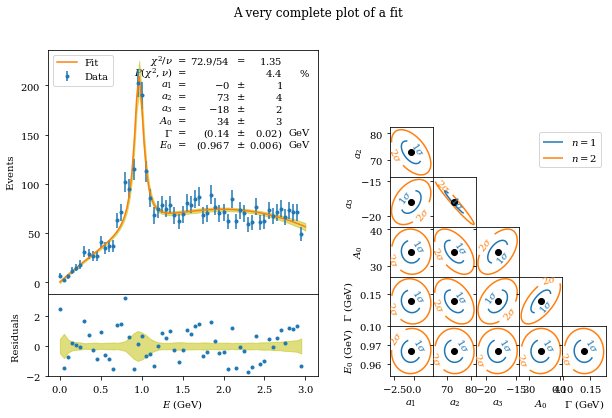

In [68]:
from matplotlib.pyplot import figure

fig = figure(figsize=(10,6))
ax = fig.subplots(nrows=2,sharex=True,squeeze=False ,
                  gridspec_kw=dict(wspace=0,hspace=0,right=.5,height_ratios=(3,1)))

nbi.plot_fit(x,y,ey,f,p,cov,ax=ax[0,0] ,
             parameters=pars, xeval=linspace(0,3,100),
             data={"label":"Data","fmt":"."},
             fit={"label":"Fit"},
             legend={"loc":"upper left"})
ax [0 ,0].set_ylabel(" Events ")

nbi.plot_residual(x,y,f,p,cov,ey,ax=ax[1,0],residuals={'marker':'.','ls':'none'})
ax [1,0].set_xlabel ("$E$ (GeV)")
ax [1,0].set_ylabel ('Residuals ')

nbi.plot_nsigma_contour(p,cov,[1 ,2],colors ='auto',
                        gridspec_kw =dict(left=.6,top =.7) , # adjust
                        legend=True, clabel=True, parameters=pars)

fig.suptitle('A very complete plot of a fit');

Again, before we go on, we store the function and the data for later use (see [below](#NLSQ)). 

In [69]:
nlsq = dict(x=x,y=y,ey=ey,ex=ex,f=f,p0=p0)

## Including $x$ uncertainties 

The `SciPy` function `scipy.optimize.curve_fit` does not take the uncertainty in the independent variable into account when fitting.   In most cases, that is indeed the correct thing to do.  However, in some cases, when the "indepedent" variable is a measured quantity with its own uncertainty, we should take that uncertainty into account.   The function `curve_fit` (and `chi2nu`) of `nbi_stat` can do that.  

There is no straight forward way of including the uncertainties on the independent variable.  The method employed by `curve_fit` is that of _effective variance_ which relies on an iterative procedure to propagate uncertainties  on the independent variable to the dependent variable (see also [Statistics Overview](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik)).  

Let us consider the following example.  The goal is to determine the inductance $L$ and resistance $R$ of a _Little Henry_ box by measuring the phase shift $\theta$ of a sine voltage across the box as a function of the wavelength $\omega$ of the sine wave

$$\cot\theta = \frac{L}{R}\omega - \frac{1}{RC}\frac1{\omega}\quad,$$
where $C$ is a known capacitance. We determine several correlated values of ($\cot\omega,\theta$) and calculate the mean and uncertainty of each variable. We end up with data

In [70]:
data = array([[22000 , 440, -4.017 , 0.5],
              [22930 , 470, -2.742 , 0.25], 
              [23880 , 500, -1.1478, 0.08],
              [25130 , 530,  1.491 , 0.09],
              [26390 , 540,  6.873 , 1.90]])

errorbar(data[:,0],data[:,2],data[:,3],data[:,1],'.',label='Data')
xlabel(r'$\omega$')
ylabel(r'$\cot\theta$')
legend(loc='upper left');

Next, we define our function, parameter names, and initial value $p_0$

In [71]:
def f(x,a,b): 
    return a * x + b / x 
pnames = ['a','b']
p0     = (1,1)

Next, we do the fit.  We do so with and without the uncertainties in the independent variable to illustrate the difference.  

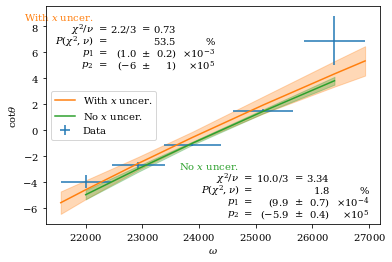

In [72]:
p,  cov  = nbi.lsq_fit(f,data[:,0],data[:,2],p0,data[:,3],data[:,1])
p2, cov2 = nbi.lsq_fit(f,data[:,0],data[:,2],p0,data[:,3])
nbi.plot_fit(data[:,0],data[:,2],data[:,3],f,p,cov,data[:,1],
             data={'fmt':'none','label':'Data'},
             parameters=dict(scale='auto'),
             fit=dict(color='C1',label='With $x$ uncer.'),
             band={'color':'C1','alpha':.3},
             table=dict(loc='upper left',
                        title={'label':'With $x$ uncer.','color':'C1'}))
nbi.plot_fit(data[:,0],data[:,2],data[:,3],f,p2,cov2,
             data=False,
             parameters=dict(scale='auto'),
             fit=dict(color='C2',label='No $x$ uncer.'),
             band={'color':'C2','alpha':.3},
             table=dict(loc='lower right',
                        title={'label':'No $x$ uncer.','color':'C2'}))
xlabel(r'$\omega$')
ylabel(r'$\cot\theta$')
legend(loc='center left');

## `mle_fit` 

Maksimum likelihood fits are obtained by, well, maximizing the likelihood 

$$\mathcal{L} = \prod_{i=1}^{n} f(x_i;p)\quad,$$ 

where $f$ is the _probability density function_ (PDF).  For this to be valid, the PDF _must_ be normalized over the measured range $X$ 

$$\int_X\mathrm{d}x\,f(x;p) = 1\quad.$$ 

However, instead of maximizing $\mathcal{L}$ we will _minimize_ $-\log\mathcal{L}$ 

$$-\ell = \log\mathcal{L} = -\log\left(\prod_{i=1}^{n}f(x_i;p)\right) = -\sum_{i=1}^{n}\log\left(f(x_i;p)\right)\quad.$$ 

Here the sum runs over the $n$ _samples_ - not bins or the like.  In fact, maximum likelihood fits are not really applicable for binned data (on _can_ do it, but then it becomes a different answer to a different question). 

Thus, the requirements of a maximum likelihood fit become 

- We have a sample of size $n$ 
- We have a _normalized_ PDF $f$ for which we want to adjust the parameters 
  - Alternatively, we can use the logarithm of the PDF $\log f$. 

_SciPy_ has no general maximum likelihood fit procedure.  However, the general minimizer routine `scipy.optimize.minimize` can be used to minimize $-\ell$.   The module `nbi_stat` provides the function `mle_fit` that uses `scipy.optimize.minimize` to do a maximum likelihood parameter estimate (Maximum Likelihood Estimate - MLE) given the _normalized_ PDF $f$ or the logarithm of the PDF $\log f$ and the samples $x_i$. 

As an example consider samples drawn from an exponential - for example the time between decays of a radioactive source. 

In [73]:
t = exponential(size=100)
t = t[t<3]

were we have limited the observations to $3$ simulating finite acceptance of our measurements.

Our PDF is given by 

$$f(t;\tau) = A \frac1{\tau}e^{-t/\tau}\quad,$$ 

where $\tau>0$ is the half-life of the source, and $A$ is the normalization factor.  The normalization must be over the range of samples.  Let us find this constant by solving 

$$\int_{0}^{a}\mathrm{d}t\,f(f;\tau) - 1 = 0\quad.$$

In [74]:
from sympy import exp as syexp, solve, Function

tt, a, A = symbols('t a A',real=True,positive=True)
tau = symbols('tau',real=True,positive=True)
f = A*syexp(-tt/tau)/tau
s = solve(f.integrate((tt,0,a))-1,A)[0]
Eq(A,s)

Eq(A, exp(a/tau)/(exp(a/tau) - 1))

Thus, our PDF becomes 

In [75]:
ff = f.subs(A,s)
Eq(Function('f')(tt,tau),ff)

Eq(f(t, tau), exp(a/tau)*exp(-t/tau)/(tau*(exp(a/tau) - 1)))

Alternatively, we can use the logarithm of this 

In [76]:
from sympy import log as sylog 
lff = sylog(ff).expand(log=True,force=True)
Eq(sylog(Function('f')(tt,tau)),lff)

Eq(log(f(t, tau)), a/tau - t/tau - log(tau) - log(exp(a/tau) - 1))

We turn this into substitute in the numerical expression we can evaluate over our sample. Also, we bind the upper limit $a$ to the maximum of our sample 

In [77]:
g = lambdify((tt,tau),ff.subs(a,t.max()))
lg = lambdify((tt,tau),lff.subs(a,t.max()))

We are now ready to perform our fit.  As with non-linear least squares fits (see [above](#lsq_fit)), we need to provide an initial guess of the parameters $p_0$.  Here, we choose a small value

In [78]:
p, cov = nbi.mle_fit(g,t,[.9])
print(p, cov)

[1.03483183] [[0.02782399]]


Alternatively, we can use the logarithm of the PDF

In [79]:
lp, lcov = nbi.mle_fit(lg,t,[.9],logpdf=True,bounds=[(1e-3,None)])
print(lp,lcov)

[1.03483189] [[0.02782012]]


Since our data in this case is the samples themselves, we need to generate a histogram of the density to illustrate our data and fits 

In [80]:
h,c,w,e = nbi.histogram(t,linspace(0,3,10),normalize=True)

Below we draw use `plot_fit` _and_ `plot_fit_table` to show both results.  Since the fits are practically on top of each other, there's no reason to draw the second plot, but we would like to see the parameter values though. 

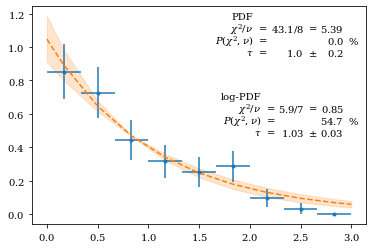

In [81]:
nbi.plot_fit(c,h,e,g,p,cov,w/2,
             parameters=[r'\tau'],
             data=dict(xerr=w/2,fmt='.',label='Data'),
             fit={'ls':'--','label':'Fit (PDF)','color':'C1'},
             table={'title':'PDF'},
             band={'alpha':.2,'color':'C1'},
             legend=False)
lchi2nu = nbi.chi2nu(c,h,g,lp,e)
nbi.plot_fit_table(lp,diagonal(lcov),chi2nu=lchi2nu,
                   pvalue=True, parameters=[r'\tau'],
                   loc='center right',
                   title='log-PDF');

We also store this function and data for later use (see [below](#MLE)). 

In [82]:
mle = dict(t=t,f=g,p0=[.9],x=c,y=h,ey=e,ex=w/2)

## `fit` 

Above, we used 3 different functions to do 

- `lin_fit` for Linear least squares (LLSQ)
- `lsq_fit` for Non-linear least squares (NLSQ) 
- `mle_fit` for Maximum likelihood (MLE)

However, there is something to be said for having a simple interface. The module `nbi_stat` therefore provides the function `fit` which will do one of the 3 procedures depend on the input given.  

- If a function of the form 

  $$f(x;p) = \sum_{i=1} p_i f_i(x)\quad,$$ 
  
  is given via a sequence of $f_i$ - for example 
  
      f = [lambda x:ones_like(x), lambda x:x, lambda x: sin(x)]
      
  for the function 
  
  $$f(x;p) = p_0 + p_1 x + p_2\sin(x)\quad,$$ 
  
  then `lin_fit` is called and a linear least squares fit is performed  (LLSQ mode).
  
- If any other function is given, _and_ both independent and dependent variable valus ($x$ and $y$), then 
  we call `lsq_fit` and perform a non-linear least squares fit (NLSQ mode).
  
- If any kind of function is given and only independent samples $x$ is given, then we call `mle_fit` and perform a maximum likelihood fit (MLE mode).  

Each of the three modes have different requirements with respect to the remaining arguments to `fit` 

- Linear least squares requires (in order)
  - A linear function given as a sequence of term functions ($f_i$'s)
  - Independent variable values ($x$)
  - Dependent variable values ($y$) 
  - Uncertainties on the dependent variable ($\delta_y$)
- Non-linear least squares requires (in order)
  - A function given as a callable (a `def ...` for example)
  - Independent variable values ($x$)
  - Dependent variable values ($y$) 
  - An initial guess at the parameter values ($p_0$)
  - Uncertainties on the dependent variable ($\delta_y$)
- Maximum likelihood estimate requires (in order)
  - A probability density function (PDF) or the logarithm of the PDF.  Note, the PDF _must_ 
    be normalized and single valued. 
  - A sample of independent variable values ($x$)
  - An initial guess at the parameter values ($p_0$)
  
In addition, any other valid arguments for the function (`lin_fit`, `lsq_fit`, or `mle_fit`) can be passed. 

In any case, the estimated parameter values and their covariance matrix is returned. 

Below, we will redo some of the fits we did above using the `fit` interface. 

### LLSQ

Here, we re-do the linear least squares fit done earlier (see [above](#lin_fit)).  Remember that we defined the function `f` as a list of term functions. 

In [83]:
p, cov = nbi.fit(llsq['f'],llsq['x'],llsq['y'],llsq['ey'])

g = lambda x,*p: dot(p,[fi(x) for fi in llsq['f']])
nbi.plot_fit(llsq['x'],llsq['y'],llsq['ey'],g,p,cov);

### NLSQ 

Next, we re-do the non-linear least squared fit done earlier (see [above](#lsq_fit)). Here, we have a regular function in `nlsq['f']` and we also give values for $x$, $y$ and $\delta_y$. 

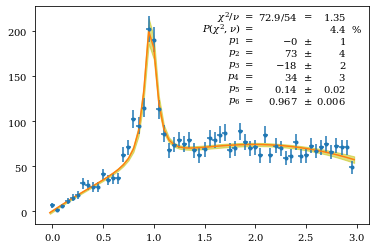

In [84]:
p, cov = nbi.fit(nlsq['f'],nlsq['x'],nlsq['y'],nlsq['p0'],nlsq['ey'])

nbi.plot_fit(nlsq['x'],nlsq['y'],nlsq['ey'],nlsq['f'],p,cov,
             data=dict(xerr=nlsq['ex'],fmt='.'));

### MLE 

Finally, we re-do the maximum likelihood fit (see [above](#mle_fit)). Our function is reqular function stored in `mle['f']` and we have the list of observations in `mle['t']`. 

In [85]:
p, cov = nbi.fit(mle['f'],mle['t'],mle['p0'])

nbi.plot_fit(mle['x'],mle['y'],mle['ey'],mle['f'],p,cov,
             data=dict(xerr=mle['ex'],fmt='.'));

The above illustrates the utility of `fit` - we simply pass it the appropriate variables and then the function takes care to do the right kind of fitting for the inputs. 

## Binned MLE

The package `nbi_stat` also provides a mechanism for performing binned maximum likelihood estimates (or fits).   Let generate as sample with a normal signal peak over an exponential background. 

In [86]:
from scipy.stats import expon, norm
from numpy import linspace, concatenate, diff, sqrt
from numpy.random import poisson, seed 
from matplotlib.pyplot import legend,xlabel,ylabel
import nbi_stat as nbi 

seed(1234)

nobs       = 1000
bins       = linspace(0,10,21) 
x          = (bins[1:]+bins[:-1])/2
w          = diff(bins)
background = poisson(nobs   * expon.pdf(x,scale=4))
signal     = poisson(nobs/2 * norm .pdf(x,loc=4,scale=.7))
data       = background+signal
hist_bg    = background,x,w,sqrt(background)
hist_sg    = signal,    x,w,sqrt(signal)
hist       = data,      x,w,sqrt(data)
nbi.plot_hist(*hist,              label='Data',fmt='o')
nbi.plot_hist(*hist_sg,background,label='Signal',    as_bar=True,alpha=.3,color='C1',ecolor='C1')
nbi.plot_hist(*hist_bg,           label='Background',as_bar=True,alpha=.3,color='C2',ecolor='C2')
legend();

The PDF we want to fit to the data is given by 

In [87]:
from sympy import pi as sypi, Lambda, sqrt as sysqrt, S
x,tau,x0,W,a,b = symbols('x tau x0 W a b',real=True,positive=True)
f = a/tau*syexp(-x/tau)+b/(sysqrt(2*sypi)*W)*syexp(-S.Half*((x-x0)/W)**2)
nf = Function('f')(x,tau,x0,W,a,b)
Eq(nf,f)

Eq(f(x, tau, x0, W, a, b), a*exp(-x/tau)/tau + sqrt(2)*b*exp(-(x - x0)**2/(2*W**2))/(2*sqrt(pi)*W))

This is _not_ normalised over the range $x\in[0,10]$, so let us calculate the integral 

In [88]:
from sympy import Integral
l,u = symbols('l u',real=True)
intf = f.integrate((x,l,u)).collect((a,b))
Eq(Integral(nf,(x,l,u)),intf)

Eq(Integral(f(x, tau, x0, W, a, b), (x, l, u)), a*(-exp(-u/tau) + exp(-l/tau)) + b*(-erf(sqrt(2)*(l - x0)/(2*W))/2 + erf(sqrt(2)*(u - x0)/(2*W))/2))

With 

\begin{align*}
  F_n(x;x_0,W) &= \frac12\left[1+\mathrm{erf}\left(\frac{x-x_0}{\sqrt{2}W}\right)\right]\\
  F_e(x;\tau)  &= 1-e^{-x/\tau}\quad,
\end{align*}

being the CDFs for the normal and exponential distributions, respectively, we find 

In [89]:
from sympy import Wild, erf as syerf, evaluate, UnevaluatedExpr

Fn = Function('F_n')
Fe = Function('F_e')
wn = Wild('wn')
we = Wild('we')
intfe = intf.replace(syexp(-we/tau),-Fe(we,tau)+1)\
            .replace(syerf(sysqrt(2)*(wn-x0)/(2*W))/2,Fn(wn,x0,W)-S.Half)\
            .replace(-syerf(sysqrt(2)*(wn-x0)/(2*W))/2,-Fn(wn,x0,W)+S.Half)
Eq(Integral(nf,(x,l,u)),intfe)

Eq(Integral(f(x, tau, x0, W, a, b), (x, l, u)), a*(-F_e(l, tau) + F_e(u, tau)) + b*(-F_n(l, x0, W) + F_n(u, x0, W)))

such that the normalisation is given by the appropriate sum of the CDFs evaluated at the end points of the interval.  

With $l=0$ and in the limit $u\rightarrow\infty$, it is easy to see that this becomes $a+b$

In [90]:
from sympy import Limit, limit, oo 
lintf = limit(intf.subs(l,S.Zero),u,oo).simplify()
Eq(Limit(Integral(nf,(x,0,u)),u,oo),lintf)

Eq(Limit(Integral(f(x, tau, x0, W, a, b), (x, 0, u)), u, oo, dir='-'), a + b*(erf(sqrt(2)*x0/(2*W)) - 1)/2 + b)

as long as $x_0 > 2\sqrt{2}W$, as the error function rapidly approaches 1 for arguments larger than 2.  What this means, is as long as our peak distribution is sufficiently (e.g., $3\sigma$ or so) far away from 0, the approximation to the integral by $a+b$ is close. 

Let us define our normalised PDF, which we will fit to our binned data. 

In [91]:
def pdf(x,tau,x0,W,b,a=1,l=bins[0],u=bins[-1]):
    from scipy.stats import expon, norm 
    from numpy import log, isnan, any
  
    ef = expon(scale=tau) 
    nf = norm(loc=x0,scale=W) 
    f = a*ef.pdf(x) + b*nf.pdf(x)
    n = a*ef.cdf(u) + b*(nf.cdf(u)-nf.cdf(l))
  
    return f / n

We can now fit our normalized PDF to the binned data 

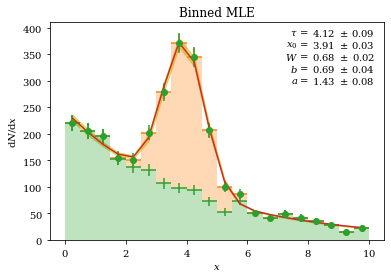

In [92]:
p, cov, opt = nbi.mle_fit(pdf,(bins,hist[0]),(4,4,1,1,1),
                          normalized=True,density=False,full_output=True)

def viz_pdf(x,*p,w=w,a=hist[0].sum()):
    return a * w[0] * pdf(x,*p) 

nbi.plot_hist(*hist_sg,background,label='Signal',    as_bar=True,alpha=.3,color='C1',ecolor='C1')
nbi.plot_hist(*hist_bg,           label='Background',as_bar=True,alpha=.3,color='C2',ecolor='C2')
nbi.plot_fit(hist[1],hist[0],hist[3],viz_pdf,p,cov,
             parameters=[r'\tau','x_0','W','b','a'],
             data={'fmt':'o'},chi2=False,pvalue=False)
xlabel(r'$x$')
ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
title('Binned MLE');

Alternatively, we can specify a logarithmic PDF

In [93]:
def logpdf(x,tau,x0,W,b,a=1,l=bins[0],u=bins[-1]):
    from scipy.stats import expon, norm 
    from numpy import log
    
    ef = expon(scale=tau)
    nf = norm(loc=x0,scale=W) 
    f = a*ef.pdf(x) + b*nf.pdf(x)
    n = a*ef.cdf(u) + b*(nf.cdf(u)-nf.cdf(l))
    
    return log(f) - log(n)

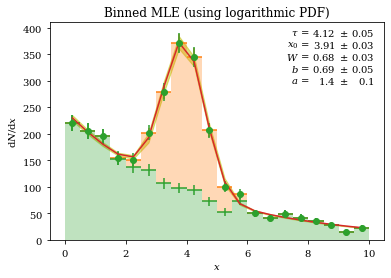

In [94]:
p, cov, opt = nbi.mle_fit(logpdf,(bins,hist[0]),(4,4,1,1,1),logpdf=True,
                          normalized=True,density=False,full_output=True)

nbi.plot_hist(*hist_sg,background,label='Signal',    as_bar=True,alpha=.3,color='C1',ecolor='C1')
nbi.plot_hist(*hist_bg,           label='Background',as_bar=True,alpha=.3,color='C2',ecolor='C2')
nbi.plot_fit(hist[1],hist[0],hist[3],viz_pdf,p,cov,
             parameters=[r'\tau','x_0','W','b','a'],
             data={'fmt':'o'},chi2=False,pvalue=False)
xlabel(r'$x$')
ylabel(r'$\mathrm{d}N/\mathrm{d}x$')
title('Binned MLE (using logarithmic PDF)');

## Extended MLE

We can also perform an extended MLE fit.  This allows us to estimate the number of events from the data with Poissonian uncertainties.  Let us fit a sample as above (normal signal over exponential background).  Note, we need to regenerate the sample as the samples above where binned. 

In [95]:
background = exponential(4,   size=nobs)
signal     = normal     (4,.7,size=nobs)
data       = concatenate((background,signal))
hist_bg    = nbi.histogram(background, bins)
hist_sg    = nbi.histogram(signal,     bins)
hist       = nbi.histogram(data,       bins)

Next, we define an unnormalized PDF.   If the data range is large enough (in our case it is), then the normalisation is approximately given by $a+b$.  We will use that to visualize the fit. 

In [96]:
def pdf(x,tau,x0,W,b,a):
    from scipy.stats import expon, norm 
    from numpy import log, isnan, any
  
    ef = expon(scale=tau) 
    nf = norm(loc=x0,scale=W) 
    f = a*ef.pdf(x) + b*nf.pdf(x)
  
    return f

def viz_pdf(x,*p):
    return p[0] * pdf(x,*p[1:]) / (p[-2] + p[-1])

We are now ready to do our extended MLE (E-MLE) fit.  Note, when performing an E-MLE fit, we have _one_ additional parameter $\nu$ - the integral of the sample.   This will be the first returned parameter from `mle_fit` and we must give a starting value for it (typically 1 or the number of observations).  We perform the fit (note, this may take a little time as we evaluate the integral of the PDF on every evaluation of the logarithmic likelihood function). 

In [97]:
p0 = (len(data),4,4,1,1,1)
p,cov, opt = nbi.mle_fit(pdf,data,p0,normalized=False,extended=True,full_output=True,tol=1-3)

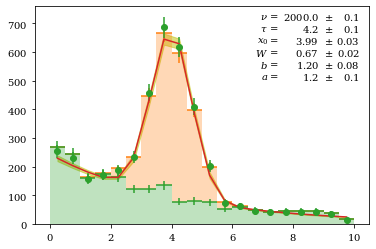

In [98]:
nbi.plot_hist(*hist_sg,hist_bg[0],label='Signal',    as_bar=True,alpha=.3,color='C1',ecolor='C1')
nbi.plot_hist(*hist_bg,           label='Background',as_bar=True,alpha=.3,color='C2',ecolor='C2')
nbi.plot_fit(hist[1],hist[0],hist[3],viz_pdf,p,cov,
             parameters=[r'\nu',r'\tau','x_0','W','b','a'],
             data={'fmt':'o'},chi2=False,pvalue=False);

We can use our approximation of the normalization of $a+b$ to fit the same data, but with a normalized PDF. 

In [99]:
def pdf(x,tau,x0,W,b,a):
    from scipy.stats import expon, norm 
    from numpy import log, isnan, any
  
    ef = expon(scale=tau) 
    nf = norm(loc=x0,scale=W) 
    f = a*ef.pdf(x) + b*nf.pdf(x)
  
    return f / (a + b)


def viz_pdf(x,*p):
    return p[0] * pdf(x,*p[1:])

In [100]:
p0 = (len(data),4,4,1,1,1)
p,cov, opt = nbi.mle_fit(pdf,data,p0,normalized=True,extended=True,full_output=True,tol=1e-5)

nbi.plot_hist(*hist_sg,hist_bg[0],label='Signal',    as_bar=True,alpha=.3,color='C1',ecolor='C1')
nbi.plot_hist(*hist_bg,           label='Background',as_bar=True,alpha=.3,color='C2',ecolor='C2')
nbi.plot_fit(hist[1],hist[0],hist[3],viz_pdf,p,cov,
             parameters=[r'\nu',r'\tau','x_0','W','b','a'],
             data={'fmt':'o'},chi2=False,pvalue=False);

It is also possible to do extended _and_ binned MLE fits (EB-MLE).  We will leave that as an exercise to the user.  For more, see also the book on statistics this note accompanies. 

# More information

- More information on the methods used here can be found in the longer text 
  [Statistics Overview - With Python](https://cholmcc.gitlab.io/nbi-python/statistics/#Statistik) (available in English and Danish).
  
- Application Programming Interface (API) documentation of `nbi_stat` is also [available](https://cholmcc.gitlab.io/nbi-python/statistics/nbi_stat).

- Many other notes on Python can be found at [the **NBI Python** site](https://cholmcc.gitlab.io/nbi-python). 

- Other documentation 
  - [NumPy](https://numpy.org)
  - [SciPy](https://scipy.org)
  - [SymPy](https://sympy.org)
  - [Matplotlib](https://matplotlib.org)
  